In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
mll_results = pd.read_csv('../BreastCancer/BC_final_results.csv', index_col=0)

In [3]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

In [4]:
sample_info = pd.read_csv('../BreastCancer/BC_sample_info.csv', index_col=0)

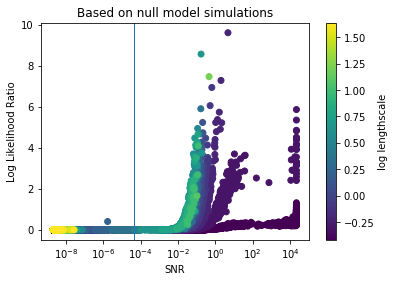

In [5]:
plt.title('Based on null model simulations')
plt.xscale('log')
plt.scatter( 1./ sim_mll_results.max_delta, sim_mll_results.D, c=np.log10(sim_mll_results.l))
plt.axvline(1./np.exp(10), lw=1);
plt.colorbar(label='log lengthscale');
plt.xlabel('SNR')
plt.ylabel('Log Likelihood Ratio');

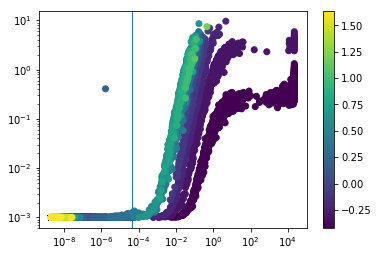

In [6]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(1./ sim_mll_results.max_delta, sim_mll_results.D, c=np.log10(sim_mll_results.l))
plt.axvline(1./ np.exp(10), lw=1);
plt.colorbar();

In [7]:
from scipy import stats

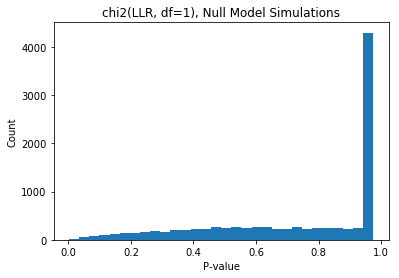

In [8]:
pval = 1 - stats.chi2.cdf(sim_mll_results.D, df=1)
plt.hist(pval, bins=30);
plt.title('chi2(LLR, df=1), Null Model Simulations');
plt.xlabel('P-value')
plt.ylabel('Count');

In [9]:
np.histogram(sim_mll_results.D, 10000)

(array([4120,   60,   48, ...,    0,    0,    1]),
 array([  9.99385484e-04,   1.95948044e-03,   2.91957539e-03, ...,
          9.60002875e+00,   9.60098884e+00,   9.60194894e+00]))

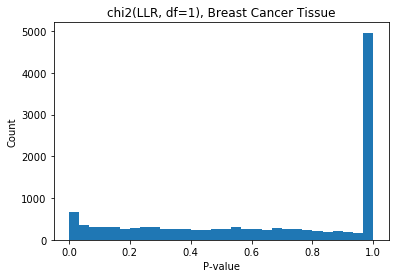

In [10]:
pval = 1 - stats.chi2.cdf(mll_results.D, df=1)
plt.hist(pval, bins=30);
plt.title('chi2(LLR, df=1), Breast Cancer Tissue');
plt.xlabel('P-value')
plt.ylabel('Count');

In [11]:
np.histogram(mll_results.D, 10000)

(array([  27, 5164,  189, ...,    0,    0,    1]),
 array([ -8.69074505e-03,   5.19753924e-04,   9.73025290e-03, ...,
          9.20778780e+01,   9.20870885e+01,   9.20962990e+01]))

In [12]:
mll_results.shape

(12856, 15)

In [13]:
(pval < 0.05 / pval.shape[0]).sum()

41

In [14]:
pval = 1 - stats.chi2.cdf(mll_results.D, df=1)
mll_results['pval'] = pval

In [15]:
import qvalue

In [16]:
mll_results['qval'] = qvalue.estimate(mll_results.pval)

In [17]:
mll_results.query('qval < 0.05').shape

(114, 15)

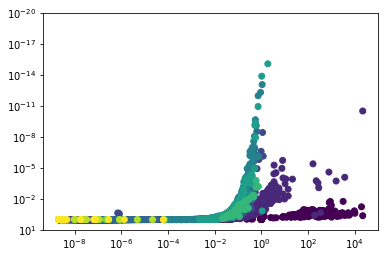

In [18]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(1. / mll_results.max_delta, mll_results['pval'], c=np.log10(mll_results.l))
plt.ylim(ymin=1e-20, ymax=10);
plt.gca().invert_yaxis();

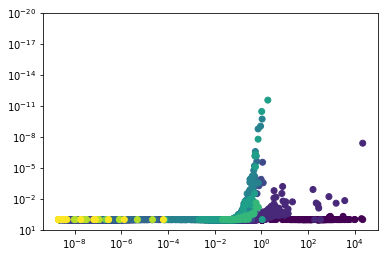

In [19]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(1. / mll_results.max_delta, mll_results['qval'], c=np.log10(mll_results.l))
plt.ylim(ymin=1e-20, ymax=10);
plt.gca().invert_yaxis();

In [21]:
import statsmodels.api as sm

In [94]:
pp = sm.ProbPlot(sim_mll_results.D, stats.chi2, (1,));

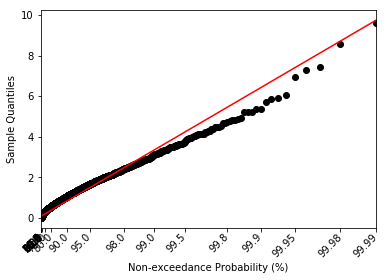

In [98]:
pp.probplot(line='r', c='k');

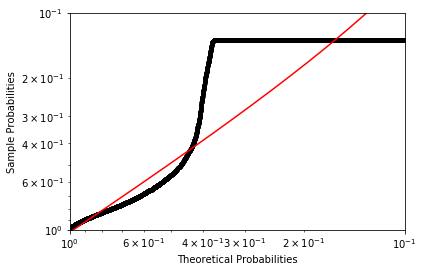

In [99]:
pp.ppplot(line='r', c='k', marker='.');
plt.loglog();
plt.xlim(xmin=1e-1)
plt.ylim(ymin=1e-1);
plt.gca().invert_yaxis();
plt.gca().invert_xaxis();

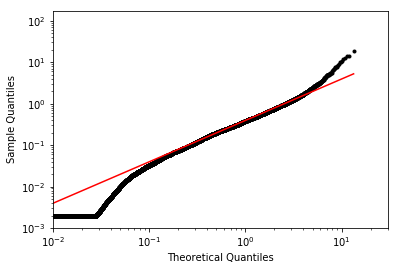

In [100]:
cls.qqplot(line='q', c='k', marker='.');
plt.loglog()
plt.xlim(xmin=1e-2)
plt.ylim(ymin=1e-3);

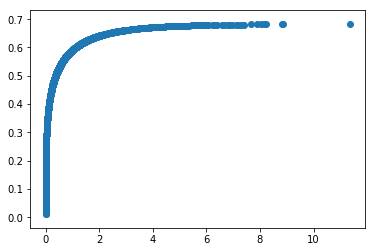

In [105]:
plt.scatter(stats.chi2.ppf(mll_results.D, df=1), stats.chi2.cdf(mll_results.D, df=1))

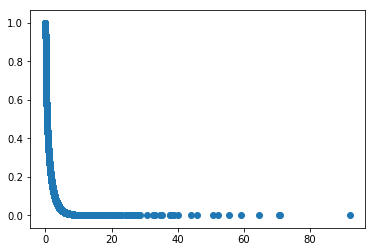

In [114]:
plt.scatter(mll_results.D, 1 - stats.chi2.cdf(mll_results.D, df=1))